In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the Boston housing dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

/home/pirate/ai_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

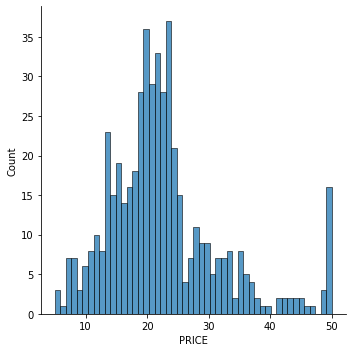

In [5]:
sns.displot(df['PRICE'], bins=50)

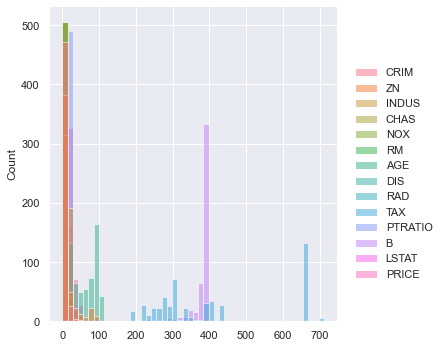

In [6]:
# plot distribution of the features
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df, bins=50)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('PRICE', axis=1), df.PRICE, test_size=0.2)

In [16]:
mlp_pipeline = Pipeline([('scaler', RobustScaler()), ('mlp', MLPRegressor())])

In [17]:
mlp_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', RobustScaler()), ('mlp', MLPRegressor())],
 'verbose': False,
 'scaler': RobustScaler(),
 'mlp': MLPRegressor(),
 'scaler__copy': True,
 'scaler__quantile_range': (25.0, 75.0),
 'scaler__unit_variance': False,
 'scaler__with_centering': True,
 'scaler__with_scaling': True,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 200,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': None,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [18]:
mlp_gridcv = GridSearchCV(mlp_pipeline,
                          param_grid={
                              'mlp__hidden_layer_sizes': [(10,5), (20,10,5), (20,10,5,2), (10,5,2)],
                              'mlp__solver': ['lbfgs', 'sgd', 'adam'],
                              'mlp__max_iter': [500,1000],
                              },
                          cv=5,
                          n_jobs=-1,
                          refit="accuracy")

In [ ]:
mlp_gridcv.fit(x_train, y_train)

In [20]:
mlp_gridcv.best_params_

{'mlp__hidden_layer_sizes': (20, 10, 5),
 'mlp__max_iter': 1000,
 'mlp__solver': 'adam'}

In [21]:
best_mlp = mlp_gridcv.best_estimator_

In [22]:
best_mlp.score(x_test, y_test)

0.7194003602547985